In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import comb

In [2]:
def probability(x):
    if x < 0:
        return 0
    else:
        return float(np.exp(-x))

def cumulative_distribution(x):
    if x < 0:
        return 0
    else:
        return float(1 - np.exp(-x))

# F⁻¹(y)
def inverse_cumulative_distribution(y):
    if y < 0 or y >= 1: # Если неверный ввод
        return np.nan
    else:
        return float(np.log(1 - y) * (-1))


# Размер выборки по умолчанию 25, можно поменять
n = 25
sample = [0.] * n

# Генерируем
for i in range(n):
    sample[i] = inverse_cumulative_distribution(random.random())


In [3]:
# a)
# Сортируем, получаем вариационный ряд
var_series = sorted(sample)
# Размах
l = var_series[-1] - var_series[0]
mediana = np.median(var_series)
counter = [var_series.count(var_series[i]) for i in range(n)]
modes = []
for i in range(n):
    if counter[i] == max(counter):
        modes.append(var_series[i])

def M_k(var_series, k):
    arr = np.array(var_series)
    return np.sum((arr - arr.mean())**k)/arr.size

assym = M_k(var_series, 3) / (M_k(var_series, 2) ** (1.5))
print("Моды: ", modes, "\nМедиана: ", mediana, "\nРазмах: ", l, "\nКоэффициент ассиметрии: ", assym)

Моды:  [0.07183329032124652, 0.10334774042353147, 0.10538209685331407, 0.13200111857273045, 0.21330431950413553, 0.24033184586698175, 0.3522941632368336, 0.4266808490442908, 0.45513699044359135, 0.5017010729817784, 0.5800133335047063, 0.643468036943376, 0.6845704389347143, 0.8171608276205197, 0.8809437106834923, 0.990912039080783, 1.0843748123790036, 1.1187567296432408, 1.2825997887547427, 1.6192924484653113, 1.715175975484485, 2.5334494915779255, 2.6129469765538476, 3.0926257107985675, 7.284319029883894] 
Медиана:  0.6845704389347143 
Размах:  7.212485739562647 
Коэффициент ассиметрии:  2.817809339576033


Text(0.5, 1.0, 'Гистограмма')

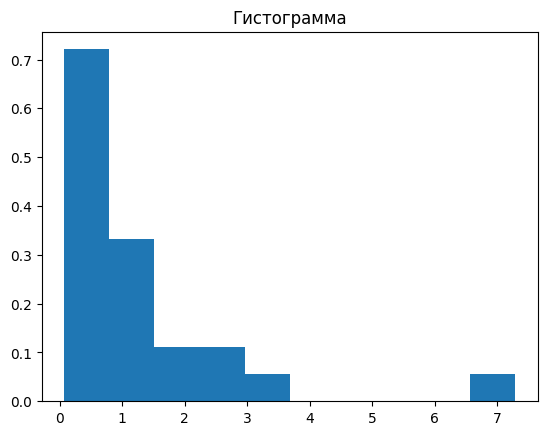

In [4]:
# b)
plt.hist(var_series, 10, density=True)
plt.title("Гистограмма")

Text(0.5, 1.0, 'Функция распределения')

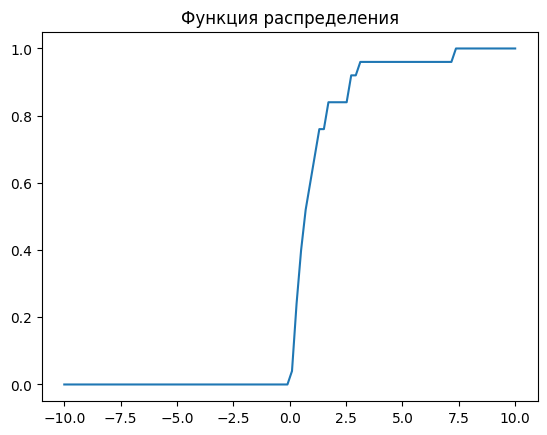

In [5]:
np_var = np.array(var_series)

distribution_right_bins = np.linspace(-10, 10, 100)
distribution = (np_var.reshape(-1, 1) < distribution_right_bins.reshape(1, -1) ).mean(0)
plt.plot(distribution_right_bins, distribution)
plt.title("Функция распределения")

Text(0.5, 1.0, 'Еще функция распределения')

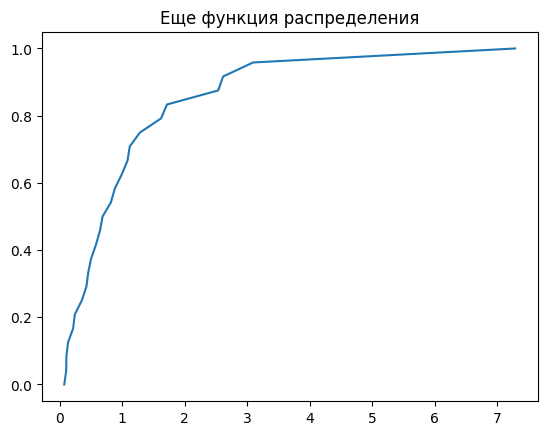

In [6]:
plt.plot(var_series, np.linspace(0, 1, len(var_series)))
plt.title("Еще функция распределения")

Text(0.5, 1.0, 'Boxplot')

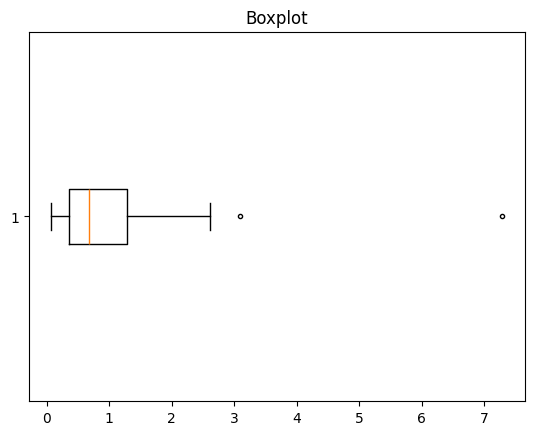

In [7]:
plt.boxplot(np_var, vert=False, sym='.')
plt.title("Boxplot")

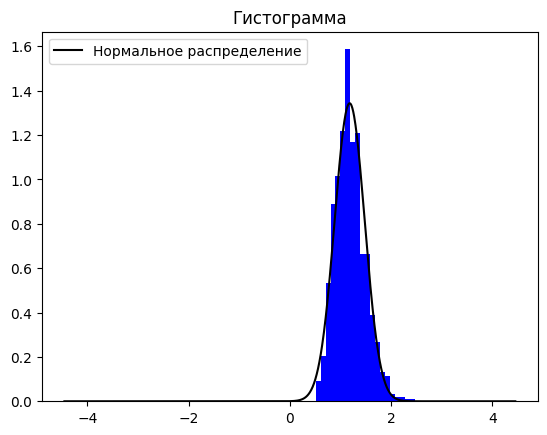

In [ ]:
# c)
from scipy.stats import norm

bootstrap_size = 1000
bootstrap_means = []
for _ in range(bootstrap_size):
    bootstrap_means.append(np.mean(np.random.choice(var_series, n, replace=True)))

myu = M_k(var_series, 1)
sigma = M_k(var_series, 2) ** 0.5
x = np.linspace(myu - sigma * 3, myu + sigma * 3, 1000)
y = norm.pdf(x, np.mean(var_series), sigma/(n**0.5))
plt.hist(bootstrap_means, 20, color='b', density=True)
plt.plot(x, y, label='Нормальное распределение', color="black")
plt.title('Гистограмма')
plt.legend()
plt.show()

Вероятность того, что коэффициент асимметрии меньше 1 ~= 0.09105


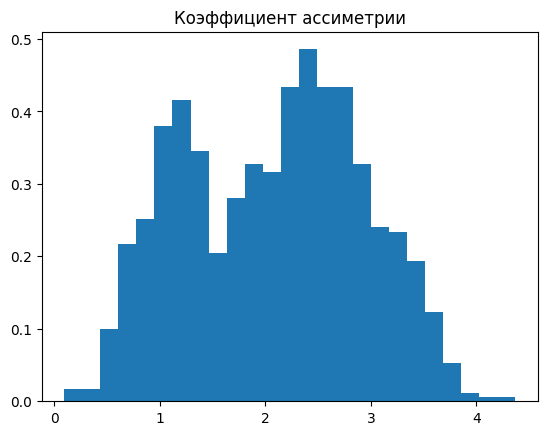

In [9]:
# d)
bootstrap_asymmetry = []
for i in range(bootstrap_size):
    boot_sample = [np.random.choice(var_series, n, replace=True)]
    bootstrap_asymmetry.append(M_k(boot_sample, 3) / (M_k(boot_sample, 2) ** 1.5))

plt.hist(bootstrap_asymmetry, 25, density=True)
plt.title('Коэффициент ассиметрии')
ans = 0.
for x in bootstrap_asymmetry:
    if x < 1:
        ans += x
print("Вероятность того, что коэффициент асимметрии меньше 1 ~=", round(ans / bootstrap_size, 5))

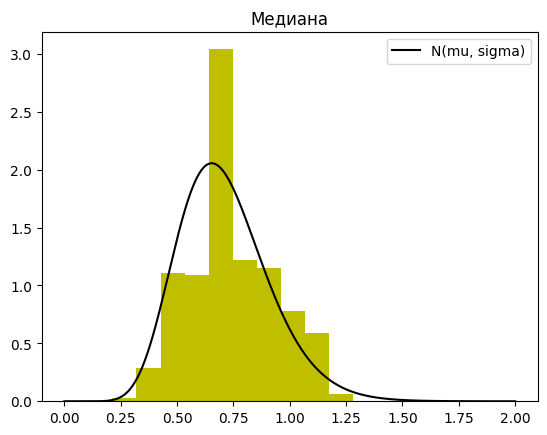

In [ ]:
# e)
bootstrap_median = []
for i in range(bootstrap_size):
    bootstrap_median.append(np.median(np.random.choice(var_series, n, replace=True)))

x = np.linspace(0, 2, bootstrap_size)
y = []
k = n // 2 + 1
for i in x:
    y.append(((1 - cumulative_distribution(i)) ** (n - k)) * (cumulative_distribution(i) ** (k-1)) * n * probability(i) * comb(n - 1, k - 1))
plt.hist(bootstrap_median, 10, color='y', density=True)
plt.plot(x, y, label='N(mu, sigma)', color = 'black')
plt.title('Медиана')
plt.legend()
plt.show()